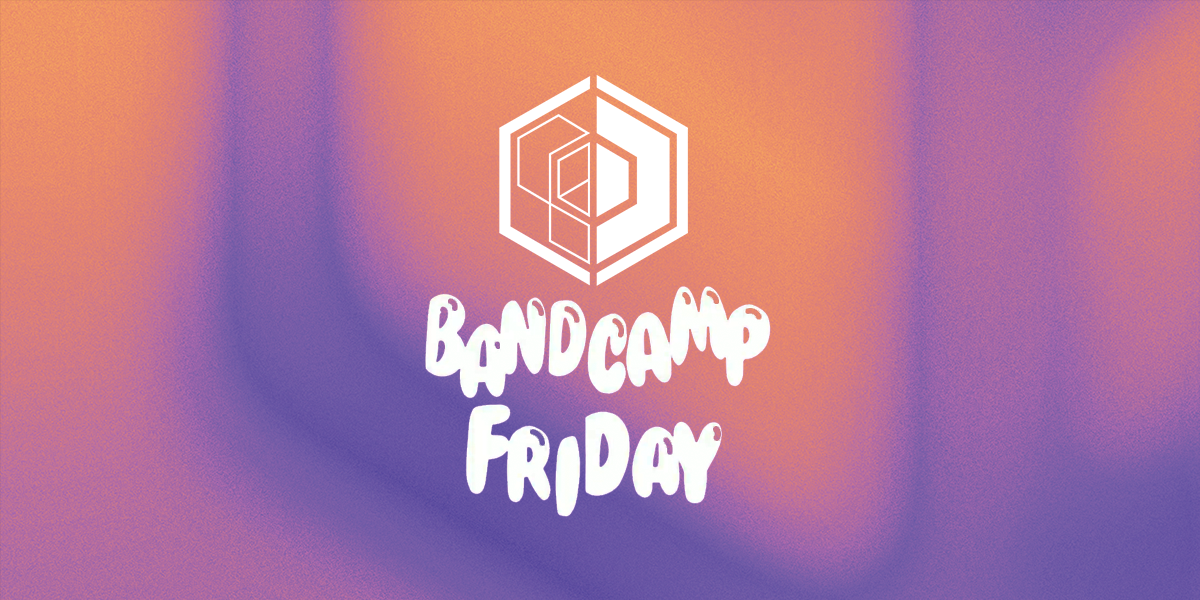

# About Bandcamp Fridays ...

In [3]:
import requests
import urllib
import json
import pandas as pd

In [4]:
tokens = pd.read_csv(r'C:\Users\waxen\Desktop\TWITTER API KEYS.txt', sep = '\t', header = None).T
tokens.columns = tokens.iloc[0]
tokens = tokens[1:]
#tokens.Bearer_Token[1]

In [5]:
def auth():
    return tokens.Bearer_Token[1]

#print(auth())

# Pull tweets about obscure band Glaare (new album released April 30)

In [62]:
def create_glaare_url():
    query = urllib.parse.quote('("Glaare") OR @glaaremusic lang:en')
    tweet_fields = 'tweet.fields=author_id,public_metrics,id,text,created_at'
    url = 'https://api.twitter.com/2/tweets/search/recent?query={}&{}'.format(query, tweet_fields)
    return url

print(create_glaare_url())

https://api.twitter.com/2/tweets/search/recent?query=%28%22Glaare%22%29%20OR%20%40glaaremusic%20lang%3Aen&tweet.fields=author_id,public_metrics,id,text,created_at


In [6]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

#print(create_headers(tokens.Bearer_Token[1]))

In [7]:
def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [8]:
def main():
    bearer_token = auth()
    url = create_glaare_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    #print(json.dumps(json_response, indent=4, sort_keys=True))
    return json_response

In [63]:
main()

200


{'data': [{'created_at': '2021-05-05T00:25:41.000Z',
   'author_id': '4160300189',
   'public_metrics': {'retweet_count': 1,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0},
   'text': 'RT @buzzbandsla: Freshly arrived in our headphones: Catch up with album releases from Rosie Tucker (@lilspoonerism), @Glaaremusic and the G…',
   'id': '1389738033079930880'},
  {'created_at': '2021-05-04T20:28:32.000Z',
   'author_id': '1150829283004375040',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 1,
    'quote_count': 0},
   'text': '@PlaIism down - glaare',
   'id': '1389678350797508611'},
  {'created_at': '2021-05-04T20:20:02.000Z',
   'author_id': '1067821663',
   'public_metrics': {'retweet_count': 1,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0},
   'text': 'RT @krbronson: Freshly arrived in our headphones: Catch up with album releases from Rosie Tucker (@lilspoonerism), @Glaaremusic and the Gra…',
   'id': '13896762137

In [64]:
glaare_data = main()

200


In [65]:
glaare_data.keys()

dict_keys(['data', 'meta'])

In [66]:
glaare_data['data'][2]

{'created_at': '2021-05-04T20:20:02.000Z',
 'id': '1389676213707284480',
 'author_id': '1067821663',
 'public_metrics': {'retweet_count': 1,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'text': 'RT @krbronson: Freshly arrived in our headphones: Catch up with album releases from Rosie Tucker (@lilspoonerism), @Glaaremusic and the Gra…'}

In [67]:
glaare_data['meta']

{'newest_id': '1389738033079930880',
 'oldest_id': '1389027416736030724',
 'result_count': 10,
 'next_token': 'b26v89c19zqg8o3fostukjzt67xx687s9p6itleyekcxp'}

In [68]:
def create_url_pag(next_token = None):
    query = urllib.parse.quote('("Glaare") OR @glaaremusic lang:en')
    tweet_fields = 'tweet.fields=author_id,public_metrics,id,text,created_at'
    if (next_token):        
        pagination = next_token
        url = 'https://api.twitter.com/2/tweets/search/recent?query={}&next_token={}&{}'.format(query, pagination, tweet_fields)
        return url
    else:
        url = 'https://api.twitter.com/2/tweets/search/recent?query={}&{}'.format(query, tweet_fields)
        return url
    
print(create_url_pag(None))
print(create_url_pag('000000000000000'))

https://api.twitter.com/2/tweets/search/recent?query=%28%22Glaare%22%29%20OR%20%40glaaremusic%20lang%3Aen&tweet.fields=author_id,public_metrics,id,text,created_at
https://api.twitter.com/2/tweets/search/recent?query=%28%22Glaare%22%29%20OR%20%40glaaremusic%20lang%3Aen&next_token=000000000000000&tweet.fields=author_id,public_metrics,id,text,created_at


In [69]:
def glaare_pages():
    count = 0
    next_token = None
    dat = pd.DataFrame()
    while (count < 4):
        bearer_token = auth()
        url = create_url_pag(next_token)        
        headers = create_headers(bearer_token)
        json_response = connect_to_endpoint(url, headers)        
        next_token = json_response['meta']['next_token']
        dat = dat.append(pd.DataFrame(json_response['data']), ignore_index = True)        
        count = count + 1
    return dat

In [70]:
glaare_pages = glaare_pages()

200
200
200
200


In [71]:
glaare_pages

,author_id,text,id,public_metrics,created_at
0,4160300189,RT @buzzbandsla: Freshly arrived in our headph...,1389738033079930880,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-05T00:25:41.000Z
1,1150829283004375040,@PlaIism down - glaare,1389678350797508611,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:28:32.000Z
2,1067821663,RT @krbronson: Freshly arrived in our headphon...,1389676213707284480,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T20:20:02.000Z
3,3230183347,"""It’s like bingeing, only better."" damn THANK ...",1389674800856006657,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:14:26.000Z
4,124401307,Check out Greatest Hits ... This Week (Vol. 19...,1389670999725985793,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:59:19.000Z
5,16262506,Check out Greatest Hits ... This Week (Vol. 19...,1389670759707070480,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:58:22.000Z
6,124401307,Freshly arrived in our headphones: Catch up wi...,1389662270859333636,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:38.000Z
7,16262506,Freshly arrived in our headphones: Catch up wi...,1389662142098456581,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:08.000Z
8,279891393,"🎧 Дарквейв, постпанк и синти-поп — в новом рел...",1389237391534215170,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T15:16:19.000Z
9,4612657398,Glaare’s stream https://t.co/dPNOq8pYBa,1389027416736030724,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T01:21:57.000Z


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [33]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [72]:
print(glaare_pages['text'][26])
print(analyser.polarity_scores(glaare_pages['text'][3]))

RT @glaaremusic: Thanks to all that worked on Your Hellbound Heart. It’s out today. Grab it @weyrdson for real life objects. Big love to al…
{'neg': 0.156, 'neu': 0.346, 'pos': 0.498, 'compound': 0.7125}


In [73]:
glaare_pages

,author_id,text,id,public_metrics,created_at
0,4160300189,RT @buzzbandsla: Freshly arrived in our headph...,1389738033079930880,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-05T00:25:41.000Z
1,1150829283004375040,@PlaIism down - glaare,1389678350797508611,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:28:32.000Z
2,1067821663,RT @krbronson: Freshly arrived in our headphon...,1389676213707284480,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T20:20:02.000Z
3,3230183347,"""It’s like bingeing, only better."" damn THANK ...",1389674800856006657,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:14:26.000Z
4,124401307,Check out Greatest Hits ... This Week (Vol. 19...,1389670999725985793,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:59:19.000Z
5,16262506,Check out Greatest Hits ... This Week (Vol. 19...,1389670759707070480,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:58:22.000Z
6,124401307,Freshly arrived in our headphones: Catch up wi...,1389662270859333636,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:38.000Z
7,16262506,Freshly arrived in our headphones: Catch up wi...,1389662142098456581,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:08.000Z
8,279891393,"🎧 Дарквейв, постпанк и синти-поп — в новом рел...",1389237391534215170,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T15:16:19.000Z
9,4612657398,Glaare’s stream https://t.co/dPNOq8pYBa,1389027416736030724,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T01:21:57.000Z


In [74]:
glaare_pages['vader_scores'] = [analyser.polarity_scores(x) for x in glaare_pages['text']]
glaare_pages['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.156, 'neu': 0.346, 'pos': 0.498, 'co...
4     {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...
5     {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...
6     {'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...
7     {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...
11    {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...
12    {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...
13    {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...
14    {'neg': 0.158, 'neu': 0.744, 'pos': 0.098, 'co...
15    {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...
16    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

In [75]:
glaare_pages

,author_id,text,id,public_metrics,created_at,vader_scores
0,4160300189,RT @buzzbandsla: Freshly arrived in our headph...,1389738033079930880,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-05T00:25:41.000Z,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1150829283004375040,@PlaIism down - glaare,1389678350797508611,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:28:32.000Z,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1067821663,RT @krbronson: Freshly arrived in our headphon...,1389676213707284480,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T20:20:02.000Z,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3230183347,"""It’s like bingeing, only better."" damn THANK ...",1389674800856006657,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T20:14:26.000Z,"{'neg': 0.156, 'neu': 0.346, 'pos': 0.498, 'co..."
4,124401307,Check out Greatest Hits ... This Week (Vol. 19...,1389670999725985793,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:59:19.000Z,"{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp..."
5,16262506,Check out Greatest Hits ... This Week (Vol. 19...,1389670759707070480,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-04T19:58:22.000Z,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp..."
6,124401307,Freshly arrived in our headphones: Catch up wi...,1389662270859333636,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:38.000Z,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp..."
7,16262506,Freshly arrived in our headphones: Catch up wi...,1389662142098456581,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-04T19:24:08.000Z,"{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou..."
8,279891393,"🎧 Дарквейв, постпанк и синти-поп — в новом рел...",1389237391534215170,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T15:16:19.000Z,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,4612657398,Glaare’s stream https://t.co/dPNOq8pYBa,1389027416736030724,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-03T01:21:57.000Z,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [76]:
glaare_pages['compound'] = [x['compound'] for x in glaare_pages['vader_scores']]
glaare_pages['compound']

0     0.0000
1     0.0000
2     0.0000
3     0.7125
4     0.6369
5     0.6369
6    -0.3818
7    -0.3818
8     0.0000
9     0.0000
10   -0.4404
11    0.6369
12    0.6369
13    0.9312
14   -0.3951
15    0.3612
16    0.0000
17    0.0000
18   -0.2811
19    0.7783
20    0.3612
21    0.7717
22    0.6588
23    0.6105
24    0.7500
25    0.0000
26    0.9062
27    0.9062
28   -0.0258
29   -0.0258
30    0.0000
31    0.0000
32    0.2023
33    0.2023
34   -0.7024
35    0.0000
36    0.6369
37    0.4329
38    0.1280
39    0.1280
Name: compound, dtype: float64

In [37]:
from matplotlib import pyplot as plt

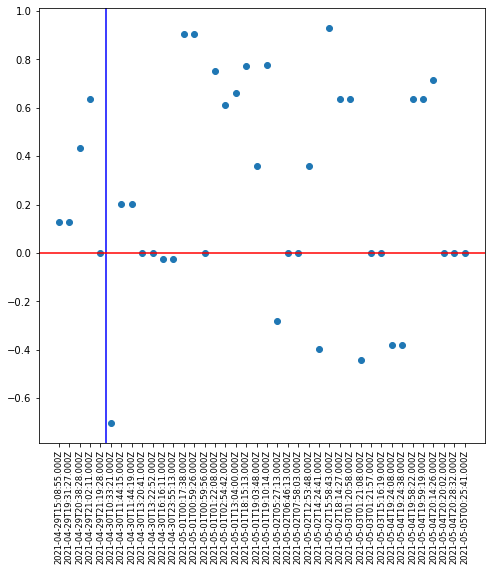

In [81]:
fig, ax1 = plt.subplots(figsize = (8,8))
ax1.scatter(glaare_pages['created_at'], glaare_pages['compound'])
ax1.invert_xaxis()
plt.xticks(rotation=90, fontsize = 'small')
plt.axvline(x=34.5, color='b', label='axvline - full height')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [82]:
avg = sum(glaare_pages['compound'])/len(glaare_pages['compound'])
print("The average is ", round(avg,2))

The average is  0.23


# Pull tweets about mainstream band Manchester Orchestra (new album released April 30)

In [9]:
def create_manchester_url():
    query = urllib.parse.quote('("manchester orchestra") OR @ManchesterOrch lang:en')
    tweet_fields = 'tweet.fields=author_id,public_metrics,id,text,created_at'
    url = 'https://api.twitter.com/2/tweets/search/recent?query={}&{}'.format(query, tweet_fields)
    return url

print(create_manchester_url())

https://api.twitter.com/2/tweets/search/recent?query=%28%22manchester%20orchestra%22%29%20OR%20%40ManchesterOrch%20lang%3Aen&tweet.fields=author_id,public_metrics,id,text,created_at


In [10]:
def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [11]:
def main2():
    bearer_token = auth()
    url = create_manchester_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)    
    return json_response

In [12]:
main2()

200


{'data': [{'id': '1389725831484743681',
   'text': '@queerdorito Would only happen if Manchester Orchestra hits them up before the final tour is rebooked',
   'author_id': '24843674',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0},
   'created_at': '2021-05-04T23:37:12.000Z'},
  {'id': '1389725321025425415',
   'text': 'RT @colbertlateshow: .@ManchesterOrch gives us a performance of "Bed Head" for today\'s edition of #PlayAtHome https://t.co/lyhVgtMIPt',
   'author_id': '915945289340645376',
   'public_metrics': {'retweet_count': 66,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0},
   'created_at': '2021-05-04T23:35:11.000Z'},
  {'id': '1389724444093042690',
   'text': 'RT @colbertlateshow: .@ManchesterOrch gives us a performance of "Bed Head" for today\'s edition of #PlayAtHome https://t.co/lyhVgtMIPt',
   'author_id': '17195560',
   'public_metrics': {'retweet_count': 66,
    'reply_count': 0,
    'like_coun

In [13]:
manchester_data = main2()

200


In [14]:
manchester_data.keys()

dict_keys(['data', 'meta'])

In [15]:
manchester_data['data'][2]

{'id': '1389724444093042690',
 'public_metrics': {'retweet_count': 66,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'created_at': '2021-05-04T23:31:41.000Z',
 'author_id': '17195560',
 'text': 'RT @colbertlateshow: .@ManchesterOrch gives us a performance of "Bed Head" for today\'s edition of #PlayAtHome https://t.co/lyhVgtMIPt'}

In [16]:
manchester_data['meta']

{'newest_id': '1389725831484743681',
 'oldest_id': '1389721499926466563',
 'result_count': 10,
 'next_token': 'b26v89c19zqg8o3fostukywvyfxuf1xsh1gi50wa2de9p'}

In [17]:
def create_url_manchester(next_token = None):
    query = urllib.parse.quote('("manchester orchestra") OR @ManchesterOrch lang:en -is:retweet')
    tweet_fields = 'tweet.fields=author_id,public_metrics,id,text,created_at'
    if (next_token):        
        pagination = next_token
        url = 'https://api.twitter.com/2/tweets/search/recent?query={}&next_token={}&{}'.format(query, pagination, tweet_fields)
        return url
    else:
        url = 'https://api.twitter.com/2/tweets/search/recent?query={}&{}'.format(query, tweet_fields)
        return url
    
print(create_url_manchester(None))
print(create_url_manchester('000000000000000'))

https://api.twitter.com/2/tweets/search/recent?query=%28%22manchester%20orchestra%22%29%20OR%20%40ManchesterOrch%20lang%3Aen%20-is%3Aretweet&tweet.fields=author_id,public_metrics,id,text,created_at
https://api.twitter.com/2/tweets/search/recent?query=%28%22manchester%20orchestra%22%29%20OR%20%40ManchesterOrch%20lang%3Aen%20-is%3Aretweet&next_token=000000000000000&tweet.fields=author_id,public_metrics,id,text,created_at


In [28]:
def manchester_pages():
    count = 0
    next_token = None
    dat = pd.DataFrame()
    while (count < 330):
        bearer_token = auth()
        url = create_url_manchester(next_token)        
        headers = create_headers(bearer_token)
        json_response = connect_to_endpoint(url, headers)        
        next_token = json_response['meta']['next_token']
        dat = dat.append(pd.DataFrame(json_response['data']), ignore_index = True)        
        count = count + 1
    return dat

In [29]:
manchester_pages = manchester_pages()

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [30]:
manchester_pages

,id,public_metrics,created_at,text,author_id
0,1389747911370608642,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-05T01:04:56.000Z,Manchester Orchestra - The Internet chords\n#M...,1077389642897342464
1,1389745241134141440,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-05T00:54:20.000Z,"RT @Alt1073Wichita: Manchester Orchestra's ""Be...",20441173
2,1389744953715273730,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-05T00:53:11.000Z,@colbertlateshow @flippinWEAVER @ManchesterOrc...,563776036
3,1389743183442157574,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-05-05T00:46:09.000Z,"Manchester Orchestra's ""Bed Head"" On 'The Late...",2777953568
4,1389743142224777223,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-05-05T00:45:59.000Z,"Manchester Orchestra's ""Bed Head"" On 'The Late...",28166618
...,...,...,...,...,...
3275,1387332085862514691,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-04-28T09:05:19.000Z,"@ManchesterOrch @YouTube Hey Prince, what song...",52184422
3276,1387331036653162497,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-04-28T09:01:09.000Z,Steve Spithray (@underthehillss) reviews the n...,245014326
3277,1387327789246865410,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-04-28T08:48:14.000Z,Een paar dagen voor het nieuwe album komt @Man...,944519172
3278,1387321537078829062,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-04-28T08:23:24.000Z,2:22am Bed Head by Manchester Orchestra from T...,2352716209


In [34]:
print(manchester_pages['text'][26])
print(analyser.polarity_scores(manchester_pages['text'][3]))

The Million Masks of God - @ManchesterOrch 
Freaking have had this album on repeat since release. So good 🎵 https://t.co/WXZnCEygUc
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [35]:
manchester_pages['vader_scores'] = [analyser.polarity_scores(x) for x in manchester_pages['text']]
manchester_pages['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'comp...
6     {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'comp...
13    {'neg': 0.242, 'neu': 0.703, 'pos': 0.055, 'co...
14    {'neg': 0.075, 'neu': 0.83, 'pos': 0.094, 'com...
15    {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...
16    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

In [36]:
manchester_pages['compound'] = [x['compound'] for x in manchester_pages['vader_scores']]
manchester_pages['compound']

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.0000
         ...  
3275    0.4404
3276    0.0000
3277   -0.2500
3278    0.2732
3279    0.0000
Name: compound, Length: 3280, dtype: float64

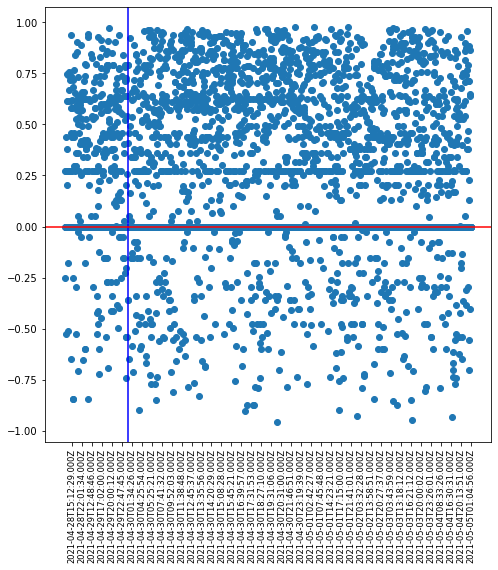

In [55]:
fig, ax1 = plt.subplots(figsize = (8,8))
ax = plt.gca()
ax1.scatter(manchester_pages['created_at'], manchester_pages['compound'])
ax1.invert_xaxis()
ax.set_xticks(ax.get_xticks()[::80])
plt.xticks(rotation=90, fontsize = 'small')
plt.axvline(x=2750, color='b', label='axvline - full height')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [56]:
avg = sum(manchester_pages['compound'])/len(manchester_pages['compound'])
print("The average is ", round(avg,2))

The average is  0.25
